In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import matplotlib
from matplotlib import font_manager,rc 
#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [34]:
gas_station = pd.read_csv("gas_station.csv", encoding="cp949")
gs_df = pd.DataFrame(gas_station)
gs_df = gs_df.loc[:, "고급휘발유":"경유"]
gs_df.head()

,고급휘발유,휘발유,경유
0,NaN,1548,1345
1,1765.0,1565,1365
2,1780.0,1566,1361
3,NaN,1568,1365
4,1805.0,1586,1384


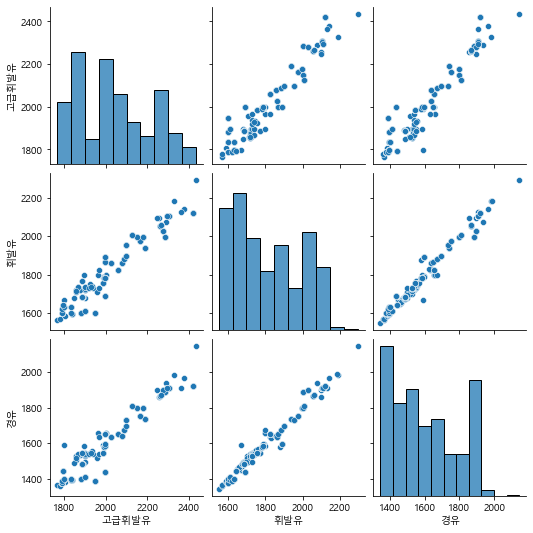

In [55]:
sns.pairplot(gs_df)
plt.show()

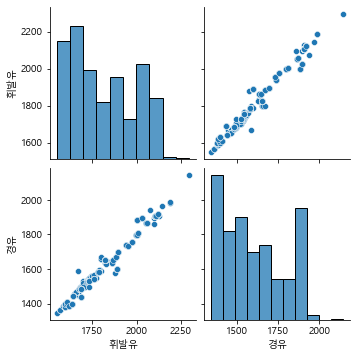

In [56]:
cols = ["휘발유","경유"]
sns.pairplot(gs_df[cols])
plt.show()

In [75]:
gs_df[cols].describe()

,휘발유,경유
count,502.000000,502.000000
mean,1809.872510,1606.567729
std,172.825618,181.499164
min,1548.000000,1345.000000
25%,1665.250000,1438.000000
50%,1774.000000,1579.000000
75%,1976.000000,1754.000000
max,2296.000000,2146.000000


In [81]:
mean = gs_df[cols].mean()
median = gs_df[cols].median()
mode = gs_df[cols].mode()
print(mean, median, mode, end="\n")

휘발유    1809.872510
경유     1606.567729
dtype: float64 휘발유    1774.0
경유     1579.0
dtype: float64       휘발유    경유
0  1598.0  1388
1     NaN  1398
2     NaN  1438
3     NaN  1909


In [97]:
gsl_ds_df = pd.DataFrame(gs_df[cols], columns=cols)

In [86]:
gs_df["고급휘발유"].min()

1765.0

In [90]:
pg = gs_df[cols].quantile(0.75).mean()

In [100]:
gs_pg = gs_df["고급휘발유"].fillna(pg)
pg_df = pd.DataFrame(gs_pg, columns=["고급휘발유"])

In [111]:
gs_df = pd.concat([pg_df,gsl_ds_df], axis=1)
gs_df.astype("int64")

,고급휘발유,휘발유,경유
0,1865,1548,1345
1,1765,1565,1365
2,1780,1566,1361
3,1865,1568,1365
4,1805,1586,1384
...,...,...,...
497,2268,2059,1869
498,2306,2105,1908
499,2305,2106,1909
500,2293,2107,1909


In [110]:
gs_df.to_csv("gas_station_full_data.csv")
pd.read_csv("gas_station_full_data.csv", index_col = 0 )

,고급휘발유,휘발유,경유
0,1865.0,1548,1345
1,1765.0,1565,1365
2,1780.0,1566,1361
3,1865.0,1568,1365
4,1805.0,1586,1384
...,...,...,...
497,2268.0,2059,1869
498,2306.0,2105,1908
499,2305.0,2106,1909
500,2293.0,2107,1909


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  엑셀 파일 읽기 
tmp = pd.read_excel("지역_위치별(주유소).xls" )
 
data = tmp.dropna(how='any') # 결측치가 있는 행이 모두 삭제됨. 

In [113]:
price_data =data[ ["휘발유","경유" ] ]
price_label =data[ ["고급휘발유"] ]
from sklearn import svm, metrics
train_data, test_data, train_label,test_label  = \
  train_test_split(price_data, price_label )
  
model = LinearRegression()

model.fit(train_data, train_label )  # 힉습 

pre = model.predict(test_data)     # 예측

#ac_score = metrics.accuracy_score(test_label, pre) # 분류 성능평가이고... 회귀문제에서는 사용안함.
print(model.score( test_data,  test_label  ) )      # 회귀 성능 평가.   

0.9182927361731262


In [114]:
tmp = pd.read_excel("지역_위치별(주유소).xls" )

#"고급휘발유"열에 결측치가 존재하는 행만 꺼내기
data = tmp [ tmp["고급휘발유"].isnull() ]
#print(data.head())

#"고급휘발유"열에 결측치가 존재하는 행만 꺼내기
data = tmp.loc[tmp.고급휘발유.isnull()  ] 
#print(data.head())

import pandas as pd
tmp = pd.read_excel("지역_위치별(주유소).xls" )

#"고급휘발유"열에 결측치가 존재하는 행만 꺼내기
data = tmp.loc[tmp.고급휘발유.isnull(), ("고급휘발유","휘발유","경유") ] 

In [127]:
data["고급휘발유"] = model.predict(data.loc[ : ,("휘발유","경유")])
data.astype("int64")

,고급휘발유,휘발유,경유
0,1775,1548,1345
3,1795,1568,1365
5,1817,1590,1390
6,1817,1595,1380
12,1831,1608,1397
...,...,...,...
436,1897,1688,1438
438,1951,1728,1528
468,1831,1608,1397
475,1897,1688,1438
